see https://github.com/bearpelican/musicautobot/blob/master/notebooks/data_encoding/short_examples/Examples.ipynb for reference

Utilizing music21 to create a  MIDI file,
this is a quick exmaple of how to utilize musicautobot's API to load, convert to Tensor, encode to musical notation, and visualize MID to chords, and play MIDI files.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
# Go to root directory of the project to import modules
import os
os.chdir('../../')

In [2]:
from utils.musicautobot.numpy_encode import *
from utils.musicautobot.utils.file_processing import process_all, process_file
from utils.musicautobot.config import *
from utils.musicautobot.music_transformer import *

In [3]:
from music21 import *

In [5]:
# Chords
c = stream.Part()
i = instrument.Piano()
i.instrumentName = 'Chords'
c.append(i)
c.append(music21.chord.Chord('A2 E3', type='half')) # vi power
c.append(music21.chord.Chord('C3 G3', type='half')) # I power

# Melody
m = stream.Part()
i = instrument.Piano()
i.instrumentName = 'Melody'
m.append(i)
m.append(note.Note('C4'))
m.append(note.Note('D4'))
m.append(note.Note('E4', type='half'))

s = stream.Score([m, c])

In [6]:
item = MusicItem.from_stream(s, MusicVocab.create())

/Users/caslabs/Documents/labs/APPLYAI/music-generation/utils/musicautobot/numpy_encode.py:53: StreamIteratorInefficientWarning: highestTime is not defined on StreamIterators. Call .stream() first for efficiency
  highest_time = max(s.flat.getElementsByClass('Note').highestTime, s.flat.getElementsByClass('Chord').highestTime)


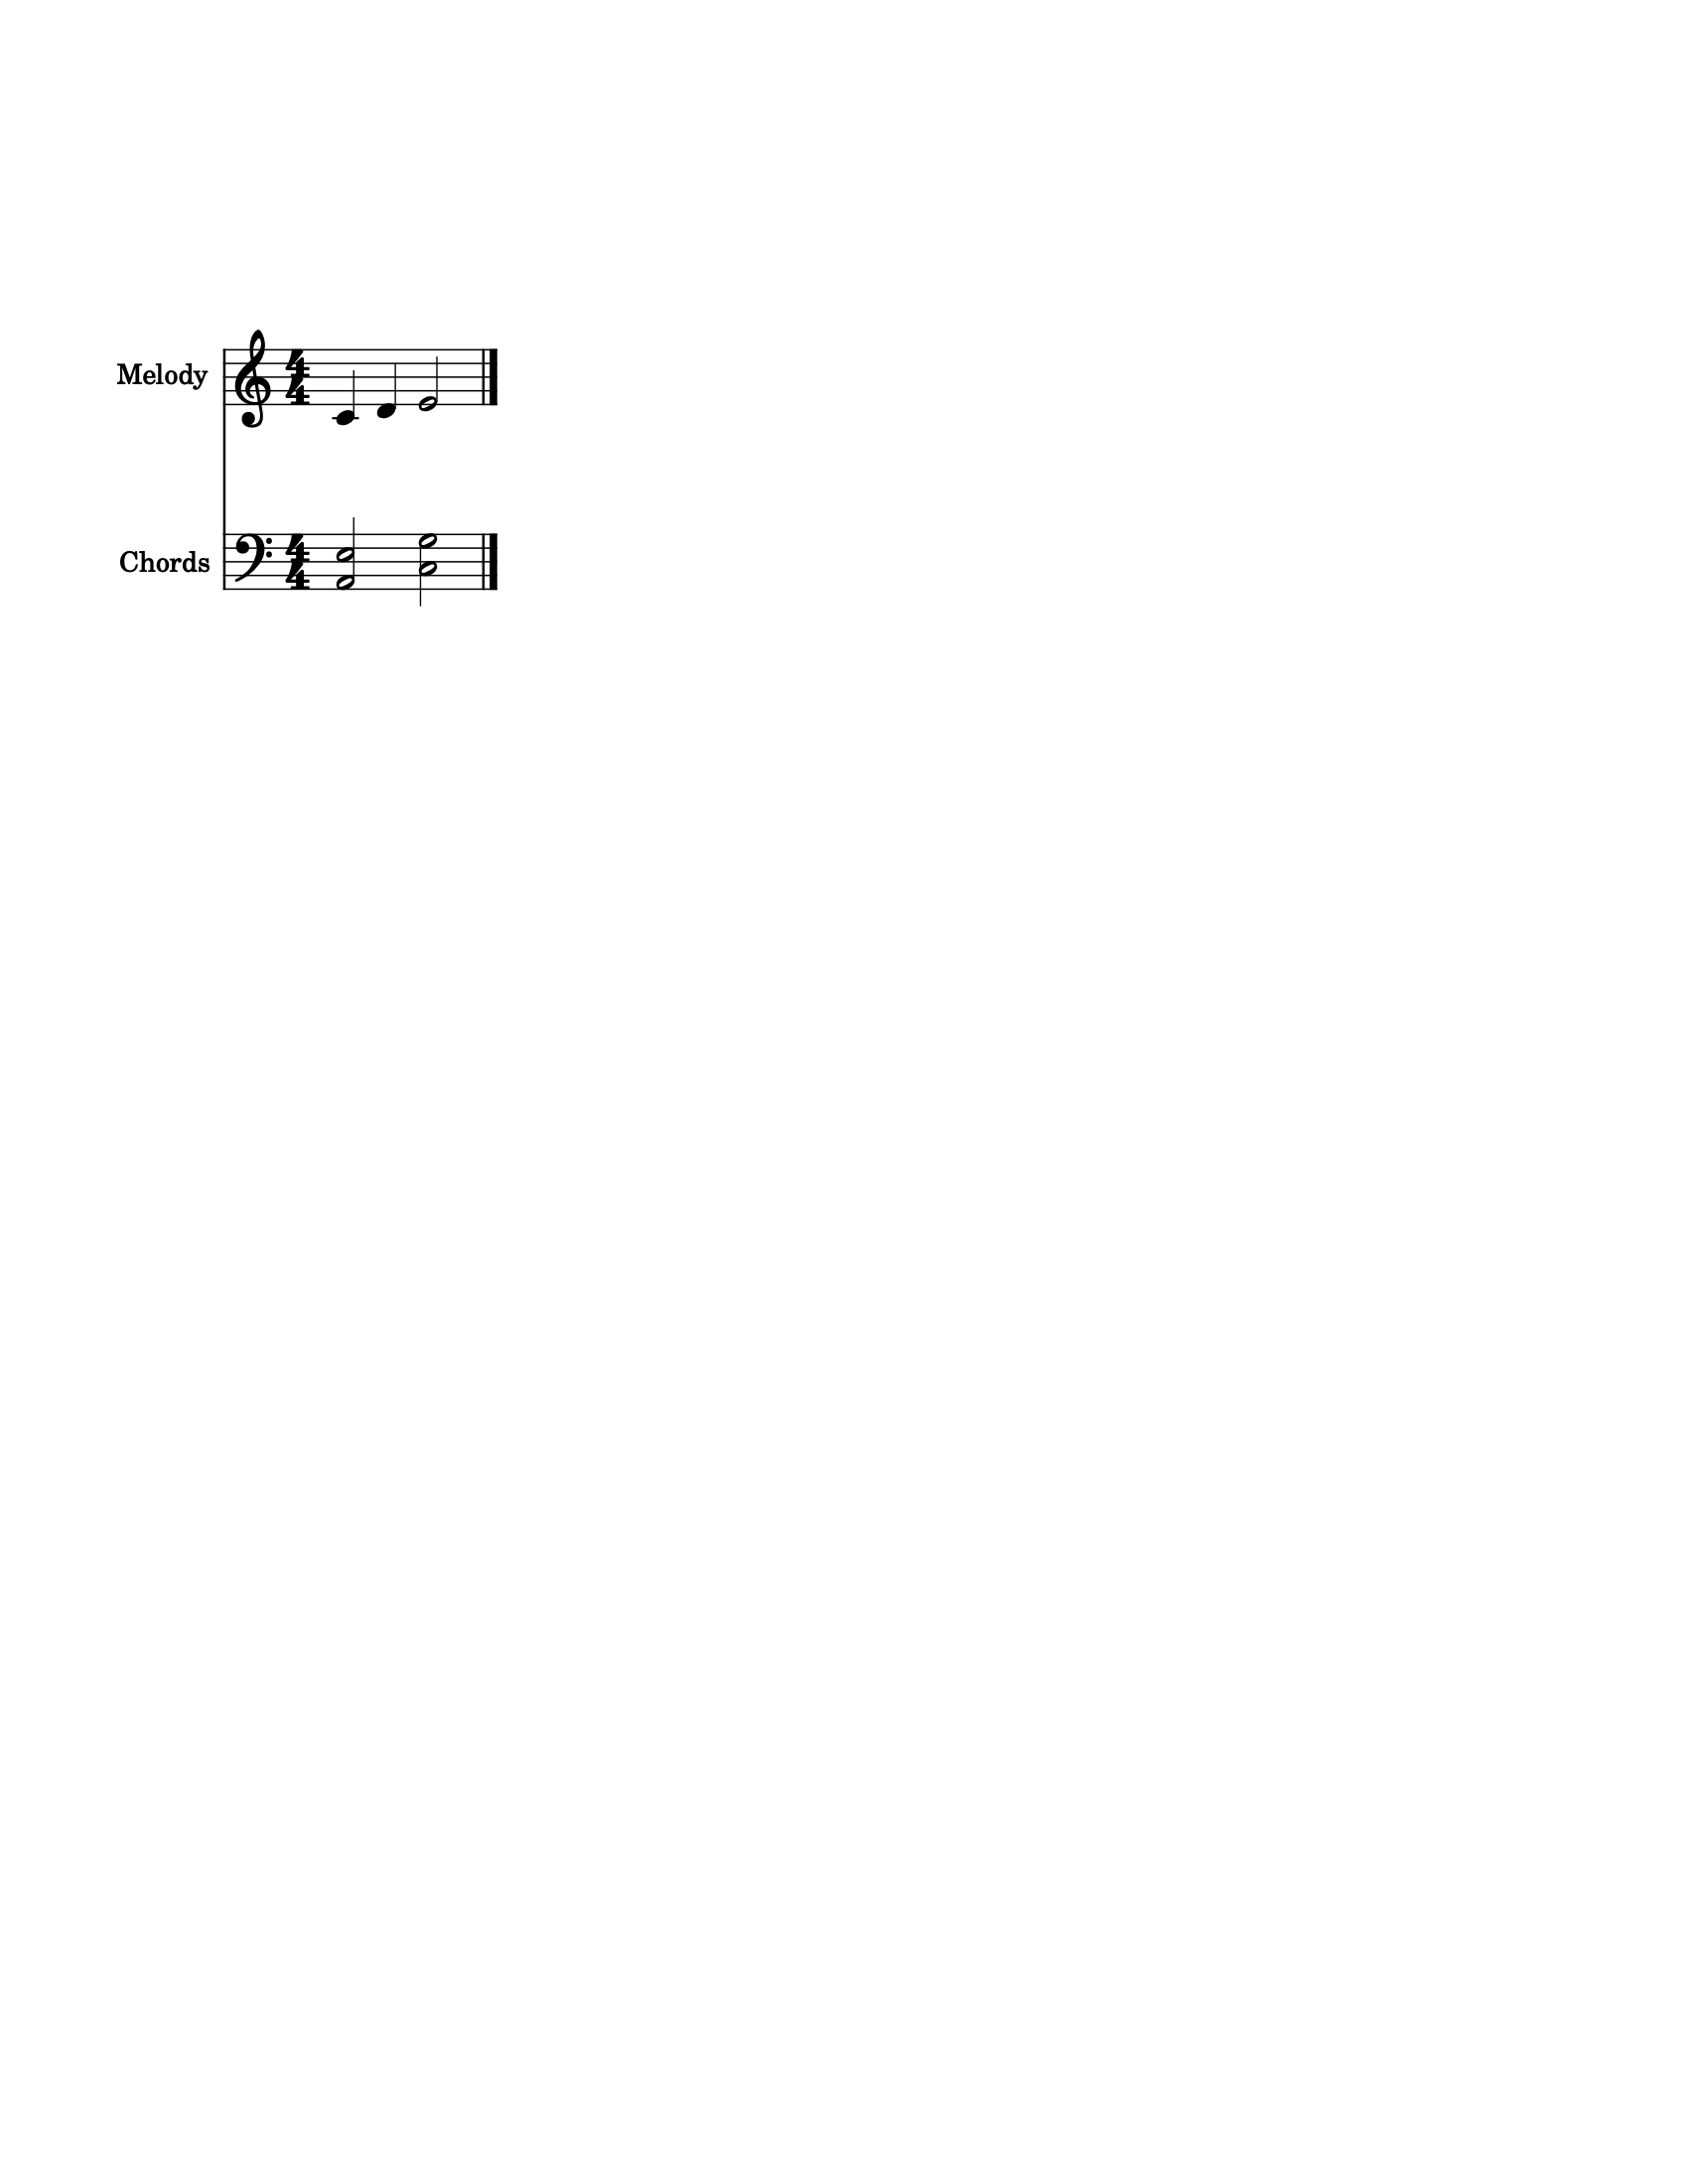

In [7]:
item.show()

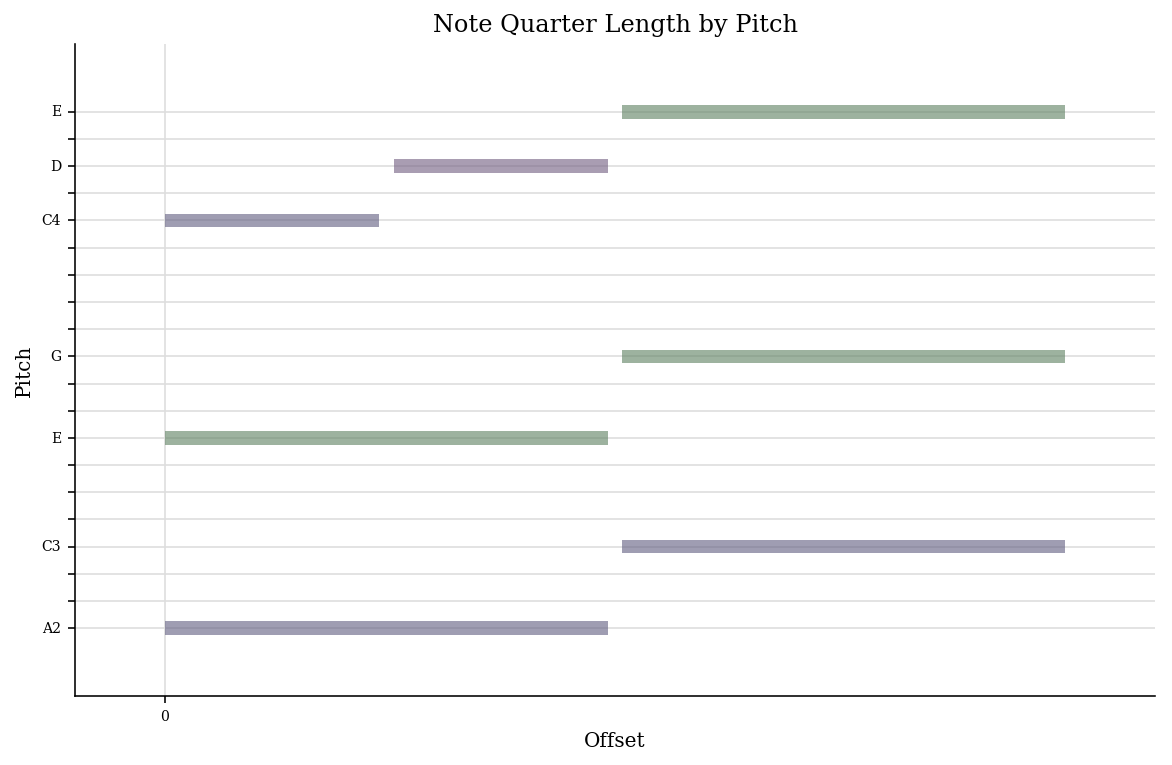

In [11]:
item.stream.plot()

In [8]:
# Tokenized
item.to_text()

'xxbos xxpad n60 d4 n52 d8 n45 d8 xxsep d4 n62 d4 xxsep d4 n64 d8 n55 d8 n48 d8'

In [9]:
# Index encoding
item.data

array([  0,   1,  69, 141,  61, 145,  54, 145,   8, 141,  71, 141,   8, 141,  73, 145,  64, 145,  57, 145])

In [10]:
# Indexes
list(range(len(item.data)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [11]:
# Beat encoding
item.position//4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [12]:
item.transpose(4)


MusicItem - (20,)
xxbos xxpad n64 d4 n56 d8 n49 d8 xxsep d4...